### CUSTO NIVELADO DE ENERGIA E FATOR DE POTÊNCIA APLICADOS EM USINAS DE CARVÃO (COAL) E GÁS, CALCULADOS EM PYTHON.

Integrantes:

ARTUR SILVA DOS SANTOS \- 211062750

GEOVANA CARVALHO DIAS \- 202046149

LEVI DE OLIVEIRA QUEIROZ \- 170108341

INTRODUÇÃO

O cálculo do custo nivelado de energia (LCOE) e do fator de capacidade é fundamental para avaliar a eficiência econômica e técnica das fontes de energia. O LCOE oferece uma métrica comparativa dos custos de diferentes tecnologias, enquanto o fator de capacidade avalia a eficiência na geração de energia. Esses indicadores são essenciais para considerar não apenas a viabilidade econômica, mas também o impacto ambiental das opções energéticas, ajudando a garantir que as escolhas feitas promovam um equilíbrio sustentável entre custos e preservação ambiental.

CUSTO NIVELADO DE ENERGIA (LCOE)

O Custo Nivelado de Energia (Levelized cost of energy – LCOE) é indicador econômico comumente utilizado para comparar tecnologias de geração de energia, definido como a razão entre todos os custos durante a vida útil de um projeto e a produção de energia esperada, o LCOE representa o custo teórico da eletricidade produzida (Castro-Santos et al., 2021). O cálculo do LCOE leva em consideração os custos de capital (capital expenditure – CAPEX), os custos de operação e manutenção (operational expenditure – OPEX) e a produção anual de energia (annual energy production – AEP) (Castro-Santos et al., 2021).
Uma das vantagens do cálculo do LCOE é a possibilidade do cálculo de custos de energia e comparação com dados de diversas fontes em vários países, a fim de que se analise a situação de cada região.

O cálculo também pode ser simplificada da seguinte maneira:
<br>

$$
LCOE(\frac{R\$}{kWh}) = \frac{CAPEX + OPEX}{PV (ENERGIA \; GERADA \; EM \; kWh \; OU \; MWh)}
$$
(eq. 1)
<br>
Onde,

CAPEX: Custos de capital investido, que inclui os custos de compra e instalação dos equipamentos, como módulos, inversores, estruturas, cabos, proteções, etc. 
OPEX: Custos de operação e manutenção, que inclui troca de componentes, monitoramento, impostos, seguros, etc.
PV: Energia gerada pelo sistema durante todo o ciclo da análise econômica, que depende da potência instalada, da radiação solar, do rendimento dos equipamentos, das perdas elétricas, etc. 



1.2 FATOR DE CAPACIDADE (FC)
Fator de Capacidade é o indicador que define o quanto uma usina gera em relação ao máximo que ela poderia gerar. Em outras palavras, significa a proporção entre a Energia Gerada e a Capacidade Instalada de um sistema de geração de energia. Portanto, o máximo de energia que um sistema pode gerar é a sua potência multiplicada pelo intervalo de tempo analisado (CONTEUDISTA).

$$
FC = \frac{Et}{P * t} = \frac{Energia(Anual)}{Potência * 8760}
$$
(eq. 2)

Onde, 
Eanual [MWh]:  Energia gerada em um período de tempo t (nesse caso 1 ano).

P [MW]: Potência Instalada.

t [h]: Intervalo de tempo considerado (nesse caso 1 ano ou 8760 horas).

2. DESENVOLVIMENTO
Para o desenvolvimento do programa para calcular e plotar os gráfico em referência o seguinte objeto de estudo, considerando a existência de supostas três usinas termelétricas e uma hidrelétrica de um estado desconhecido “X”, com os seguintes valores:

|  | Coal | Gas | HFO | Hydro |
| :---- | ----- | ----- | ----- | ----- |
| Capacidade (MW)  | 400 | 400 | 200 | 200 |
| Custo da planta ($/kW) | 1100 | 700 | 2000 | 1870 |
| Custo fixo O\&M ($/kW/ano) | 20 | 9 | 45 | 4 |
| Custo Variável O\&M ($/MWh) | 5 | 3 | 10 | 0 |
| Custo combustível ($/MWh) | 17 | 40 | 51 | 0 |
| Fator de capacidade | 0,7 | 0,7 | 0,8 | 0,78 ou 0,48 |
| Taxa de desconto  | 0,1 | 0,1 | 0,1 | 0,1 |
| Vida útil | 20 | 20 | 25 | 50 |

**Tabela 1 \- Dados objeto de estudo.**  

Determinaremos o LCOE de duas delas  e o fator de capacidade (FC) onde ambas se igualam,  utilizando linguagem Python.

Para isso, definirem algumas funções e constantes que serão utilizadas:


In [10]:
%pip install numpy
%pip install pandas
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def capex(capacidade, custo_planta):
    return capacidade * custo_planta

def energia_ano(capacidade, fator_capacidade):
    return capacidade * (365 * 24) * fator_capacidade

def opex(custo_fixo, capacidade, custo_variavel, energia_ano, custo_combustivel):
    cta = custo_fixo * capacidade
    cva = energia_ano * custo_variavel
    cca = energia_ano * custo_combustivel
    return cta + cva + cca

def vpl_opex(opex, desconto, ano):
    return sum(opex/(1 + (desconto**i)) for i in range(1, ano+1))

def vpl_energia(energia, desconto, ano):
    return sum(energia/(1 + (desconto**i)) for i in range(1,ano+1))

def lcoe(fator_capacidade,capacidade, custo_planta, custo_fixo, custo_variavel, custo_combustivel, desconto, conversor=1, ano=1):
    energia_ano_ = energia_ano(capacidade, fator_capacidade)
    capex_ = capex(capacidade, custo_planta*conversor)
    opex_ = opex(custo_fixo*conversor, capacidade, custo_variavel, energia_ano_, custo_combustivel)
    vpl_opex_ = vpl_opex(opex_,desconto, ano)
    pv = vpl_energia(energia_ano_,desconto,ano)

    return (capex_ + vpl_opex_) / pv

def graph_trab_3(titulo, coal, gas):
    fator_capacidade = np.arange(0.1,1.3,0.1)
    
    dados = {
        'Fator Capacidade': fator_capacidade,
        'LCOE COAL': coal,
        'LCOE GAS': gas
    }
    
    df = pd.DataFrame(dados)
    
    plt.figure(figsize=(10,6))
    
    for fc in df.columns[1:]:
        plt.plot(df['Fator Capacidade'], df[fc], marker='o', label="LCOE COAL", color='b')
    for fc in df.columns[2:]:    
        plt.plot(df['Fator Capacidade'], df[fc], marker='s', label="LCOE GAS", color='r')
    
    plt.title(f'{titulo} X Fator Capacidade')
    plt.xlabel('Fator Capacidade')
    plt.ylabel('LCOE ($)')
    plt.legend()
    plt.grid(True)
    
    plt.show()

##### Cálculos

<span style="margin-right: 3em;"></span>Logo abaixo será realizado os cáculos de LCOE e Custo Total.

<span style="margin-right: 3em;"></span>Adicionei as variáveis:

In [12]:
custo_planta_coal = 1100
custo_fixo_coal = 20
capacidade_coal = 400
custo_variavel_coal = 5
custo_combustivel_coal = 17
fator_capacidade_coal = 0.7

custo_planta_gas = 700
custo_fixo_gas = 9
capacidade_gas = 400
custo_variavel_gas = 3
custo_combustivel_gas = 40
fator_capacidade_gas = 0.7

desconto = 0.1
n = 25
ml = 1000

##### Cálculo COAL:

In [13]:
lcoe_coal = lcoe(fator_capacidade_coal,capacidade_coal, custo_planta_coal, custo_fixo_coal, custo_variavel_coal, custo_combustivel_coal, desconto, ml, n)

print(f"LCOE = {lcoe_coal}")

LCOE = 32.46642430062247


O resultado foi 
$$
LCOE(\frac{R\$}{kWh}) = 32.46
$$



##### Cálculo GAS:

In [14]:
lcoe_gas = lcoe(fator_capacidade_gas,capacidade_gas, custo_planta_gas, custo_fixo_gas, custo_variavel_gas, custo_combustivel_gas, desconto, ml, n)

print(f"LCOE = {lcoe_gas}")

LCOE = 49.05261217873329


O resultado foi 
$$
LCOE(\frac{R\$}{kWh}) = 49.05
$$

##### Plotando o Gráfico LCOE x Fator Capacidade

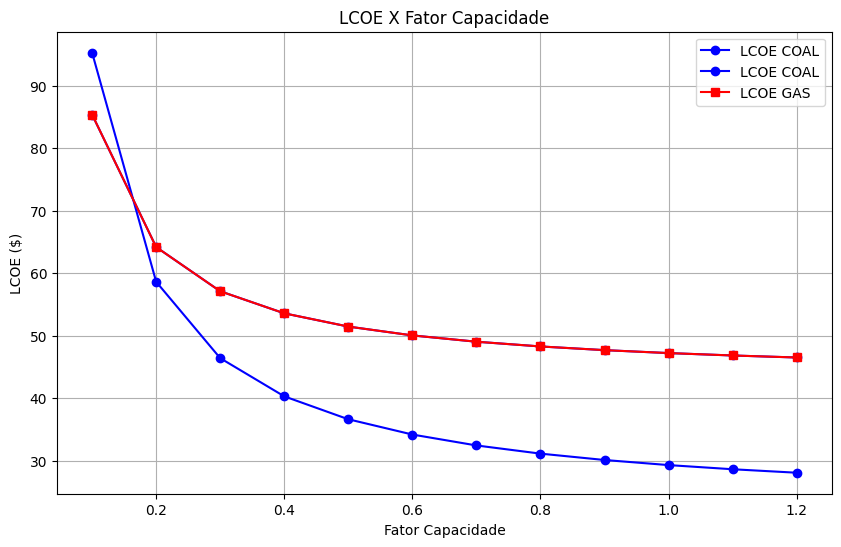

In [15]:
fator_capacidade = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2]

# COAL

lcoe_coal_ = []

for i in fator_capacidade:
    lcoe_aux = lcoe(i,capacidade_coal, custo_planta_coal, custo_fixo_coal, custo_variavel_coal, custo_combustivel_coal, desconto, ml, n)
    lcoe_coal_.append(lcoe_aux)

# GAS

lcoe_gas_ = []

for i in fator_capacidade:
    lcoe_aux = lcoe(i,capacidade_gas, custo_planta_gas, custo_fixo_gas, custo_variavel_gas, custo_combustivel_gas, desconto, ml, n)
    lcoe_gas_.append(lcoe_aux)

graph_trab_3("LCOE", lcoe_coal_, lcoe_gas_)

##### Plotando o Gráfico Custo Total x Fator Capacidade

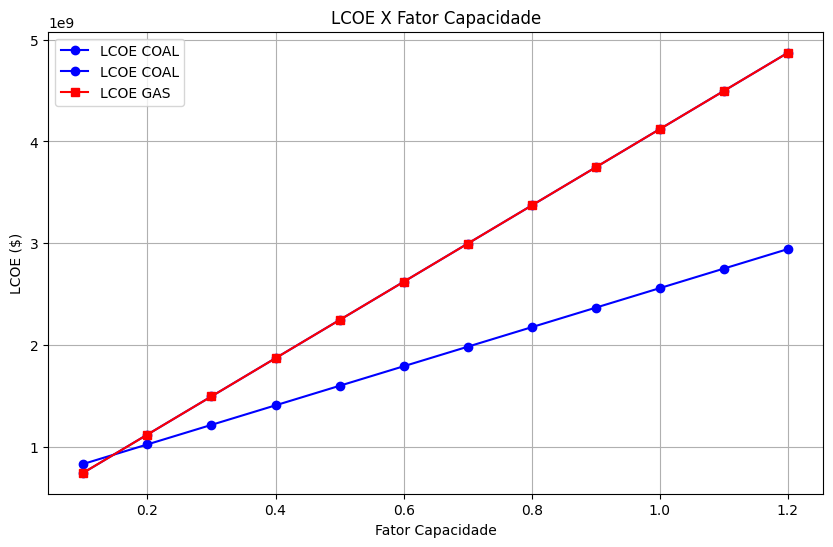

In [21]:
fator_capacidade = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2]

# COAL

lcoe_coal_ = []

for i in fator_capacidade:
    energia_ano_coal = energia_ano(capacidade_coal, i)
    capex_ = capex(capacidade_coal, custo_planta_coal*ml)
    opex_ = opex(custo_fixo_coal*ml, capacidade_coal, custo_variavel_coal, energia_ano_coal, custo_combustivel_coal)
    vplOpex_ = vpl_opex(opex_, desconto, n)
    somaCapexVplOpex = capex_ + vplOpex_
    lcoe_coal_.append(somaCapexVplOpex)

# GAS

lcoe_gas_ = []

for i in fator_capacidade:
    energia_ano_gas = energia_ano(capacidade_gas, i)
    capex_ = capex(capacidade_gas, custo_planta_gas*ml)
    opex_ = opex(custo_fixo_gas*ml, capacidade_gas, custo_variavel_gas, energia_ano_gas, custo_combustivel_gas)
    vplOpex_ = vpl_opex(opex_, desconto, n)
    somaCapexVplOpex = capex_ + vplOpex_
    lcoe_gas_.append(somaCapexVplOpex)

graph_trab_3("LCOE", lcoe_coal_, lcoe_gas_)